In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
X = housing.data
y = housing.target

X_name = housing.feature_names
y_name = housing.target_names
print(X_name, y_name)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


In [4]:
data = np.c_[X, y]
df_housing = pd.DataFrame(data, columns = X_name + y_name)
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


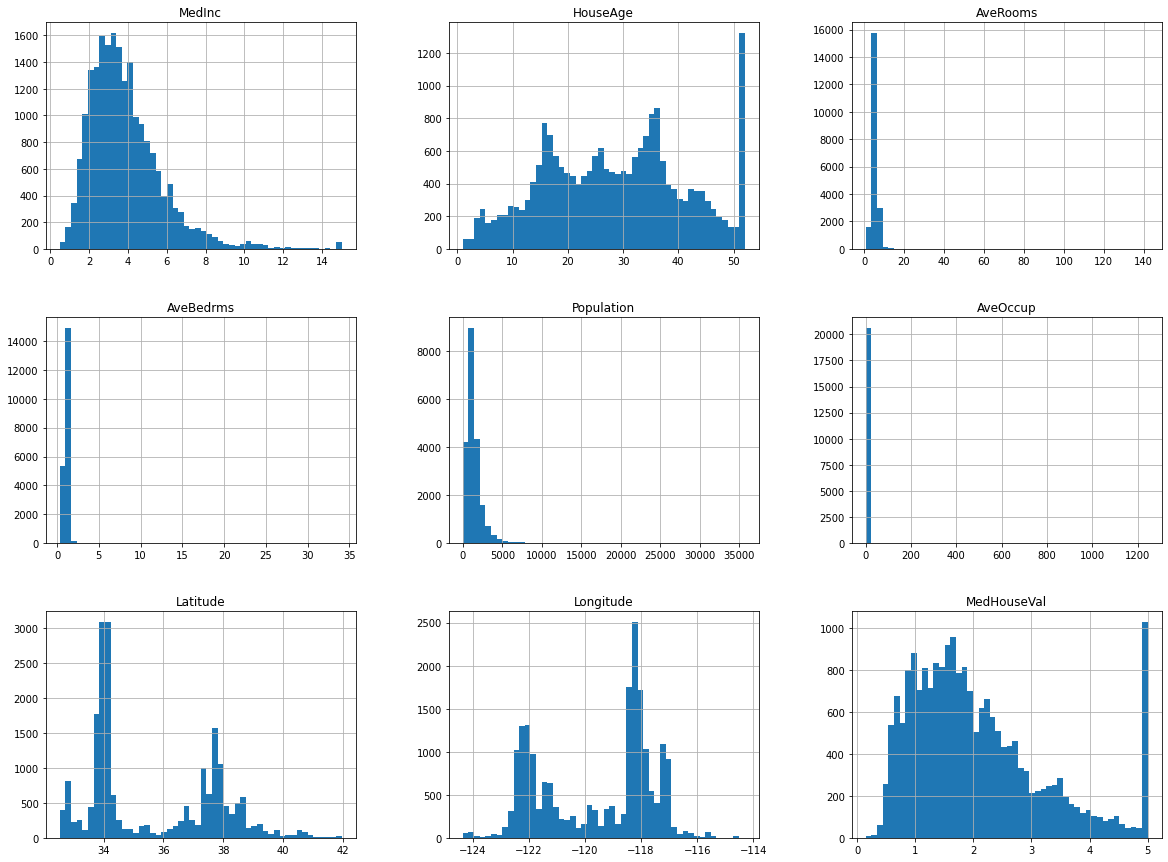

In [6]:
df_housing.hist(bins = 50, figsize=(20,15))
plt.show()

In [7]:
# correlations between features
corr_matrix = df_housing.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55ada02110>,
      dtype=object)

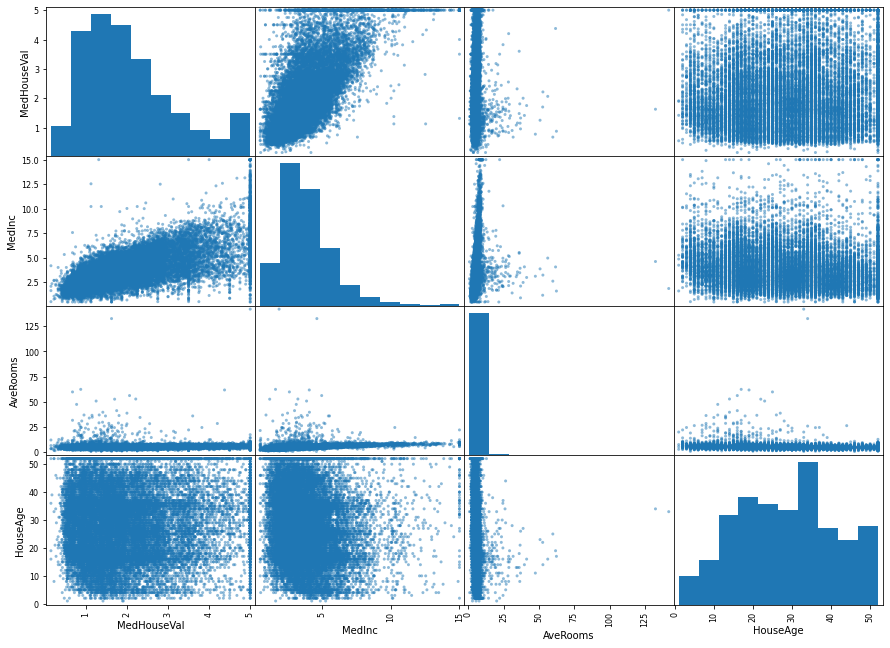

In [8]:
from pandas.plotting import scatter_matrix
features = ['MedHouseVal', 'MedInc', 'AveRooms', 'HouseAge']
scatter_matrix(df_housing[features], figsize=(15,11))

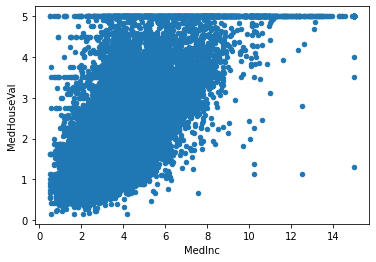

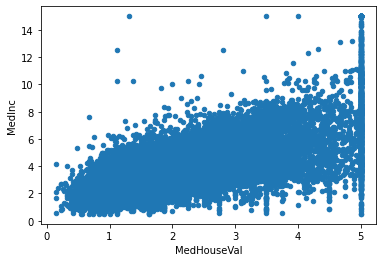

In [9]:
df_housing.plot(x = 'MedInc', y = 'MedHouseVal', kind='scatter')
df_housing.plot(y = 'MedInc', x = 'MedHouseVal', kind='scatter')

In [10]:
housing_data = df_housing.drop('MedHouseVal', axis=1)
housing_labels = df_housing['MedHouseVal'].copy()

In [42]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(housing_data, housing_labels, test_size = 0.2, random_state=42)

In [43]:
print('%.3f' % train_data['MedInc'].mean())
print('%.3f' % test_data['MedInc'].mean())

 3.881
 3.830


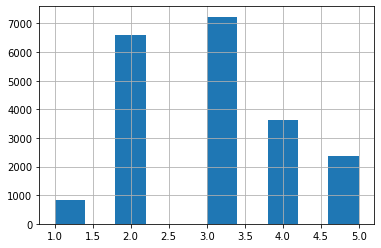

In [44]:
# create categorical MedInc to correct train test split
df_housing['MedInc_cat'] = pd.cut(df_housing['MedInc'],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])
df_housing['MedInc_cat'].hist()

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing['MedInc_cat']):
  train_data = housing_data.loc[train_index]
  train_labels = housing_labels.loc[train_index]
  test_data = housing_data.loc[test_index]
  test_labels = housing_labels.loc[test_index]

In [46]:
print('%.3f' % train_data['MedInc'].mean())
print('%.3f' % test_data['MedInc'].mean())

3.876
3.850


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

#**Train, validate and fine-tune models**

**Linear regression**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)
lin_predict = lin_reg.predict(train_data)
lin_rmse = mean_squared_error(train_labels, lin_predict, squared=False)
lin_rmse

0.7271433201356049

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
print(lin_rmse_scores,'\n mean rmse of linear regression: ', lin_rmse_scores.mean())

[0.74571946 0.69960318 0.7186325  0.74445404 0.70953926 0.76172221
 0.74576182 0.72513212 0.70844341 0.74241372] 
 mean rmse of linear regression:  0.7301421715595152


**Decission tree**

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data, train_labels)
tree_predict = tree_reg.predict(train_data)
tree_rmse = mean_squared_error(train_labels, tree_predict, squared=False)
tree_rmse

2.7828633694390173e-16

In [20]:
scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores,'\n mean rmse of decision tree: ', tree_rmse_scores.mean())

[0.76873076 0.71750915 0.70256264 0.73517401 0.72358414 0.75191189
 0.74101863 0.74101124 0.68038024 0.72496345] 
 mean rmse of decision tree:  0.7286846139962809


**Support Vector Regression**

In [38]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(train_data, train_labels)
svr_predict = svr_reg.predict(train_data)
svr_rmse = mean_squared_error(train_labels, svr_predict, squared=False)
svr_rmse

0.5855767559322819

In [28]:
scores = cross_val_score(svr_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)
print(svr_rmse_scores,'\n mean rmse of svr: ', svr_rmse_scores.mean())

[0.53887632 0.49682325 0.47183154 0.51944187 0.47928401 0.52083441
 0.54070904 0.51181268 0.4853025  0.53663092] 
 mean rmse of svc:  0.5958325783792859


Randomized search

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import random

params = {
    'kernel': ['rbf', 'linear'],
    'gamma': [0.01, 0.1, 1, 10],
    'C': [0.01, 0.1, 1, 10] 
}
rnd_search = RandomizedSearchCV(svr_reg, param_distributions=params,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_mean_squared_error')

In [31]:
results = rnd_search.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [32]:

for mean_test_score, params in zip(results['mean_test_score'], results['params']):
  print(np.sqrt(-mean_test_score), params)

1.4230634466699892 {'kernel': 'linear', 'gamma': 1, 'C': 10}
1.301085955546209 {'kernel': 'linear', 'gamma': 10, 'C': 0.1}
0.6446934578055435 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
1.4128474251442606 {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
0.7292745893963783 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
1.301085955546209 {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
0.8188788177143342 {'kernel': 'rbf', 'gamma': 10, 'C': 10}
1.4230634466699892 {'kernel': 'linear', 'gamma': 0.01, 'C': 10}
0.6768602270791332 {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
0.8343558623851617 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}
0.9074634686379506 {'kernel': 'rbf', 'gamma': 1, 'C': 0.01}
0.6738495362597825 {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.9281838079049023 {'kernel': 'linear', 'gamma': 1, 'C': 0.01}
1.301085955546209 {'kernel': 'linear', 'gamma': 1, 'C': 0.1}
1.301085955546209 {'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}
1.4128474251442606 {'kernel': 'linear', 'gamma': 10, 'C': 1}
0.928183807904

In [33]:
print(rnd_search.best_params_)
print(np.sqrt(-rnd_search.best_score_))

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
0.5796952961164694


**Random forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_data, train_labels)
forest_predict = forest_reg.predict(train_data)
forest_rmse = mean_squared_error(train_labels, forest_predict, squared=False)
forest_rmse

0.18978518544177794

In [22]:
scores = cross_val_score(forest_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
print(forest_rmse_scores,'\n mean rmse of random forest: ', forest_rmse_scores.mean())

[0.53887632 0.49682325 0.47183154 0.51944187 0.47928401 0.52083441
 0.54070904 0.51181268 0.4853025  0.53663092] 
 mean rmse of random forest:  0.5101546538452515


Grid search

In [34]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [10, 20, 30], 'n_estimators': [100, 150, 200], 'max_features': [2, 5, 8]}
grid_search = GridSearchCV(forest_reg, params, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [2, 5, 8],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [35]:
results = grid_search.cv_results_
results.keys()
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
  print(np.sqrt(-mean_test_score), params)

0.5504719503136478 {'max_depth': 10, 'max_features': 2, 'n_estimators': 100}
0.5507585474311153 {'max_depth': 10, 'max_features': 2, 'n_estimators': 150}
0.5498717115798054 {'max_depth': 10, 'max_features': 2, 'n_estimators': 200}
0.5425986949422725 {'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
0.540661455700948 {'max_depth': 10, 'max_features': 5, 'n_estimators': 150}
0.5409968664164236 {'max_depth': 10, 'max_features': 5, 'n_estimators': 200}
0.5466324109828552 {'max_depth': 10, 'max_features': 8, 'n_estimators': 100}
0.5467732543053941 {'max_depth': 10, 'max_features': 8, 'n_estimators': 150}
0.5455477119850378 {'max_depth': 10, 'max_features': 8, 'n_estimators': 200}
0.5009400110933018 {'max_depth': 20, 'max_features': 2, 'n_estimators': 100}
0.5010197956997483 {'max_depth': 20, 'max_features': 2, 'n_estimators': 150}
0.5001614305322846 {'max_depth': 20, 'max_features': 2, 'n_estimators': 200}
0.5052376648915555 {'max_depth': 20, 'max_features': 5, 'n_estimators': 100}


In [36]:
print(grid_search.best_params_)
print(np.sqrt(-grid_search.best_score_))

{'max_depth': 30, 'max_features': 2, 'n_estimators': 200}
0.4980808437922536


#**Evaluate the best model on test set**

In [37]:
model = grid_search.best_estimator_

test_data = scaler.fit_transform(test_data)
predictions = model.predict(test_data)
final_rmse = mean_squared_error(test_labels, predictions, squared=False)
print('RMSE of the best model on test dataset: ', final_rmse)

RMSE of the best model on test dataset:  0.6524175795103606
